In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset (for example, using a sample customer dataset)
# For demonstration purposes, we'll generate a simple synthetic dataset.

# Assuming a dataset with columns: 'Age', 'Income', 'Purchase_Frequency'
data = {
    'Age': [25, 45, 35, 50, 23, 29, 42, 41, 33, 40, 51, 60, 26, 37, 43],
    'Income': [50000, 100000, 75000, 120000, 45000, 55000, 95000, 105000, 65000, 70000, 130000, 150000, 48000, 80000, 95000],
    'Purchase_Frequency': [15, 25, 20, 40, 10, 15, 30, 32, 19, 22, 45, 50, 12, 18, 31]
}

df = pd.DataFrame(data)
df
# or give the input of dataset 
# df = pd.read_csv(file_name)

,Age,Income,Purchase_Frequency
0,25,50000,15
1,45,100000,25
2,35,75000,20
3,50,120000,40
4,23,45000,10
5,29,55000,15
6,42,95000,30
7,41,105000,32
8,33,65000,19
9,40,70000,22


In [2]:
# Step 2: Preprocess the data
# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.34560097, -1.15734002, -0.90285547],
       [ 0.62357118,  0.47118721, -0.05110503],
       [-0.36101489, -0.3430764 , -0.47698025],
       [ 1.11586422,  1.1225981 ,  1.22652064],
       [-1.54251818, -1.32019274, -1.32873069],
       [-0.95176654, -0.99448729, -0.90285547],
       [ 0.32819536,  0.30833449,  0.37477019],
       [ 0.22973675,  0.63403993,  0.54512028],
       [-0.55793211, -0.66878185, -0.56215529],
       [ 0.13127814, -0.50592913, -0.30663016],
       [ 1.21432282,  1.44830355,  1.65239586],
       [ 2.10045029,  2.09971444,  2.07827108],
       [-1.24714236, -1.22248111, -1.1583806 ],
       [-0.16409768, -0.18022368, -0.64733034],
       [ 0.42665397,  0.30833449,  0.45994524]])

In [3]:
# Step 3: Apply K-Means clustering
# Let's assume we want to create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


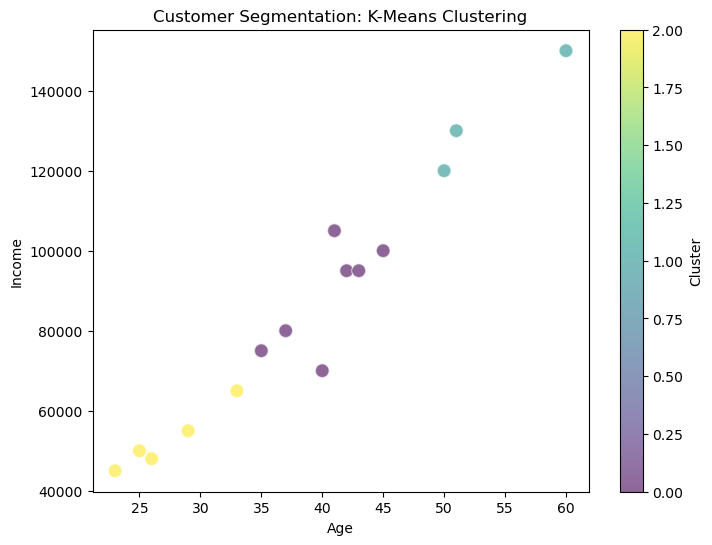

In [4]:
# Step 4: Visualize the clusters (using a 2D scatter plot for simplicity)
plt.figure(figsize=(8, 6))

# Plot the clusters
plt.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolors='w')
plt.title('Customer Segmentation: K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Cluster')
plt.show()

In [5]:
# Step 5: Evaluate the clustering performance
# Inertia (Sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_
print(f'Inertia (within-cluster sum of squares): {inertia}')

# Silhouette Score (higher value indicates better defined clusters)
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Inertia (within-cluster sum of squares): 5.8727714369318065
Silhouette Score: 0.51721350191884


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

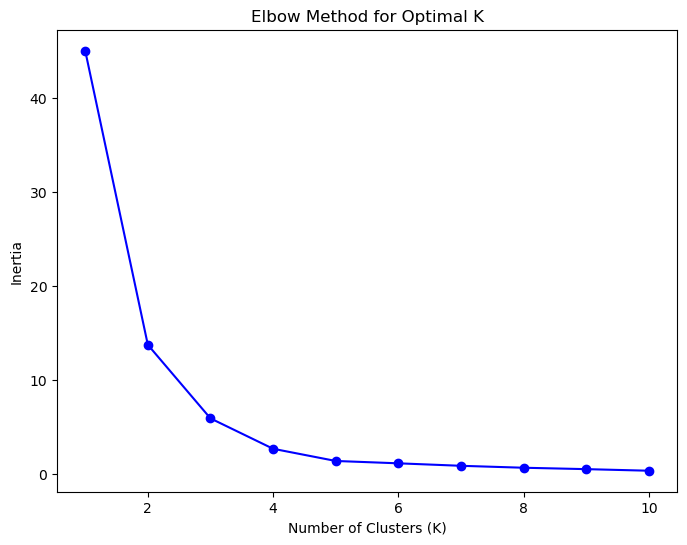

In [6]:
# Step 6: Elbow Method to Determine the Optimal Number of Clusters
# We can visualize the elbow method to determine the best value for K

inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()